In [406]:
# Install necessary libraries
!pip install lifelines
!pip install -U scikit-learn scipy matplotlib

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter

In [407]:
# Load the expression data
expression_data = pd.read_csv('/Users/gao/Downloads/brca_tcga_pan_can_atlas_2018/data_mrna_seq_v2_rsem_zscores_ref_all_samples.txt', sep='\t', header=0)

# Remove the irrelevant data (first column)
expression_data = expression_data.iloc[:, 1:]

# Preprocess gene expression data
# Drop all rows containing NaN values
clean_expression_data = expression_data.dropna()

# Set 'Entrez_Gene_Id' as index
clean_expression_data.set_index('Entrez_Gene_Id', inplace=True)

# Calculate mean and standard deviation of z-scores for each gene
mean_zscores = clean_expression_data.mean(axis=1)
std_zscores = clean_expression_data.std(axis=1)

# Define a threshold for filtering genes (e.g., genes with z-scores more than 1 standard deviation below the mean)
zscore_threshold = mean_zscores - 1 * std_zscores

# Calculate variances of each gene
variances = clean_expression_data.var(axis=1)
print('Mean variance = ', variances.mean())

# Set a threshold for variance (decided after trials based on mean variance)
threshold = 1.115

# Filter genes based on the threshold
high_variance_genes = variances[variances >= threshold].index

# Filter the dataframe to keep only high variance genes
clean_expression_data_filtered = clean_expression_data.loc[high_variance_genes]
clean_expression_data_filtered


Mean variance =  0.9958096838303242


,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,TCGA-A1-A0SE-01,...,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01
Entrez_Gene_Id,,,,,,,,,,,,,,,,,,,,,
100133144,1.0923,0.3525,0.6434,0.6945,-0.0258,-0.6632,-1.6559,1.0067,0.3866,0.4544,...,-2.4527,-0.5747,-2.9255,-0.2774,-2.9255,-2.9255,0.9220,1.5076,-1.2605,-0.0187
100134869,1.0262,1.4779,0.5227,0.7937,1.1927,1.1036,0.4850,1.1889,0.8264,-0.5060,...,1.1866,0.7669,-0.9761,1.1865,-0.0253,-0.9062,1.8034,2.1801,0.1806,2.0295
26823,-1.9713,0.6577,-1.9713,-0.7346,-0.7049,-1.9713,-0.4685,-0.6428,-0.9504,-1.9713,...,-1.9713,-1.9713,-0.2572,-0.5839,-1.9713,3.8294,2.7559,-0.5892,-0.2984,-0.9046
388795,-1.1130,1.6310,0.7764,0.4191,0.9013,0.5799,3.0279,-0.4701,-1.1323,-0.3878,...,2.1481,-1.6629,0.6437,0.3131,-1.6629,1.0273,0.0932,-0.0241,-0.7933,0.8080
391714,0.3338,-0.0894,-2.1301,-2.1301,-2.1301,-2.1301,-2.1301,-0.3824,-0.7871,-0.7931,...,-2.1301,-2.1301,-2.1301,-2.1301,-2.1301,-2.1301,-2.1301,-2.1301,-2.1301,-0.7268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729747,0.6262,1.0974,1.2193,-1.3763,0.2145,-0.9940,1.0386,-0.4672,-0.3410,-1.0153,...,-1.1766,-0.4623,-2.1962,-0.2437,-2.9885,-0.0613,-0.1076,1.0287,-0.2722,0.6402
741,0.3935,1.1869,0.9218,1.2131,0.5075,0.6727,0.4356,-5.2797,0.0164,-1.6857,...,1.9516,0.9181,2.4901,0.6066,1.8515,1.0182,-0.5073,0.5173,1.0099,1.4257
284312,-1.6226,0.5764,2.0250,-0.2419,1.1709,1.0161,-1.5202,-0.0908,0.3179,0.3870,...,0.4023,-1.4184,2.2551,1.1854,0.9573,1.6115,-1.5931,0.3704,1.0010,0.8786


In [408]:
# Transpose the expression data
clean_expression_data_filtered = clean_expression_data_filtered.transpose()
clean_expression_data_filtered

Entrez_Gene_Id,100133144,100134869,26823,388795,391714,652919,51146,15,340273,653190,...,90333,57232,374879,442319,7634,729747,741,284312,222696,342933
TCGA-3C-AAAU-01,1.0923,1.0262,-1.9713,-1.1130,0.3338,0.2009,4.0305,-0.7889,-1.2681,0.5926,...,0.6803,1.1762,0.9557,-1.6085,-0.9866,0.6262,0.3935,-1.6226,1.1143,-0.4033
TCGA-3C-AALI-01,0.3525,1.4779,0.6577,1.6310,-0.0894,-0.3891,-0.6443,1.8275,0.5533,0.3269,...,0.5435,-0.2942,-0.1429,-1.2045,0.5105,1.0974,1.1869,0.5764,-0.2990,1.9348
TCGA-3C-AALJ-01,0.6434,0.5227,-1.9713,0.7764,-2.1301,-2.8937,-1.7541,1.4590,0.0750,-0.4672,...,-0.2165,-0.0573,-0.6636,-1.2878,0.4493,1.2193,0.9218,2.0250,1.2796,-2.1197
TCGA-3C-AALK-01,0.6945,0.7937,-0.7346,0.4191,-2.1301,-2.8937,-1.7541,-0.6365,-0.7831,-0.9303,...,-0.7656,-1.1140,0.2436,-0.4545,0.0109,-1.3763,1.2131,-0.2419,0.7956,-0.6621
TCGA-4H-AAAK-01,-0.0258,1.1927,-0.7049,0.9013,-2.1301,-0.8708,-0.8481,-0.6112,-1.2127,-0.5104,...,0.4449,0.0899,1.0446,-0.0443,0.2142,0.2145,0.5075,1.1709,-0.0397,0.2834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WT-AB44-01,-2.9255,-0.9062,3.8294,1.0273,-2.1301,-2.8937,-0.2314,-1.6909,-0.0075,1.4824,...,-1.7114,1.0377,-2.6464,-0.7448,-1.1143,-0.0613,1.0182,1.6115,-1.6321,0.2171
TCGA-XX-A899-01,0.9220,1.8034,2.7559,0.0932,-2.1301,0.4879,-0.2699,0.6840,2.3391,-0.9542,...,-0.9716,-0.7074,0.5631,0.2748,1.8964,-0.1076,-0.5073,-1.5931,0.2416,-0.2345
TCGA-XX-A89A-01,1.5076,2.1801,-0.5892,-0.0241,-2.1301,1.1617,1.6806,0.3346,0.3172,1.1603,...,-0.9022,-0.1370,0.1927,0.3152,1.1574,1.0287,0.5173,0.3704,1.5147,2.6327
TCGA-Z7-A8R5-01,-1.2605,0.1806,-0.2984,-0.7933,-2.1301,-1.9280,-1.7541,-1.6909,0.1162,0.5074,...,-1.9058,-0.0029,-1.9784,-0.9374,-0.1834,-0.2722,1.0099,1.0010,-1.7460,-2.1197


In [409]:
# Check if there are duplicated column names
print('There are no duplicated column names: ', len(clean_expression_data_filtered.columns) == len(set(clean_expression_data_filtered.columns)))

# Function to detect duplicate column names
def find_duplicate_columns(df):
    """
    Detects duplicate columns in a DataFrame.
    
    Parameters:
    - df: pandas DataFrame
    
    Returns:
    - List of duplicate column names
    """
    duplicate_columns = []
    seen_columns = set()
    
    for column in df.columns:
        if column in seen_columns:
            duplicate_columns.append(column)
        else:
            seen_columns.add(column)
    
    return set(duplicate_columns)

duplicate_columns = find_duplicate_columns(clean_expression_data_filtered)
print("Duplicate columns:", list(duplicate_columns))

There are no duplicated column names:  False
Duplicate columns: [79813, 5414, 286183, 84631, 55531, 26220, 2258, 22997, 445815, 284697, 387707]


In [410]:
# Function to aggregate duplicate columns with the same name
def aggregate_duplicate_columns(df, duplicated_column_names):
    """
    Aggregates mean values of duplicate columns with the same name and returns a refined DataFrame.
    
    Parameters:
    - df: pandas DataFrame with duplicate column names
    - duplicated_column_names: list of column names that have duplicates (as strings)
    
    Returns:
    - Refined DataFrame with aggregated columns
    """
    # Ensure column names are strings
    df.columns = df.columns.astype(str)
    
    # Create a copy of the original DataFrame to avoid modifying it directly
    df_refined = df.copy()
    
    # Iterate through each duplicated column name
    for col_name in duplicated_column_names:
        col_name = str(col_name)  # Ensure col_name is a string
        
        # Select columns with the same name
        cols_to_avg = df_refined.filter(like=col_name, axis=1)
        
        if not cols_to_avg.empty:
            # Calculate the mean across all duplicate columns
            df_refined[col_name] = cols_to_avg.mean(axis=1)
            
            # Drop the original duplicate columns
            df_refined = df_refined.drop(cols_to_avg.columns, axis=1)
    
    return df_refined

# Aggregate the mean for duplicate columns
refined_expression_data = aggregate_duplicate_columns(clean_expression_data_filtered, duplicate_columns)

print('There are no duplicated column names: ', len(refined_expression_data.columns) == len(set(refined_expression_data.columns)))

There are no duplicated column names:  True


In [411]:
# Load the clinical sample data
clinical_sample = pd.read_csv('/Users/gao/Downloads/brca_tcga_pan_can_atlas_2018/data_clinical_sample.txt', sep='\t', header=None)

# Clean the metadata lines
clinical_sample = clinical_sample[~clinical_sample.iloc[:, 0].str.startswith('#')]

# Grab the first row for the header
new_header = clinical_sample.iloc[0]

# Take the data less the header row
clinical_sample = clinical_sample[1:]

# Set the header row as the dataframe header
clinical_sample.columns = new_header

# Filter only patient ID and sample ID
clinical_sample = clinical_sample[['PATIENT_ID', 'SAMPLE_ID']]
clinical_sample

4,PATIENT_ID,SAMPLE_ID
5,TCGA-3C-AAAU,TCGA-3C-AAAU-01
6,TCGA-3C-AALI,TCGA-3C-AALI-01
7,TCGA-3C-AALJ,TCGA-3C-AALJ-01
8,TCGA-3C-AALK,TCGA-3C-AALK-01
9,TCGA-4H-AAAK,TCGA-4H-AAAK-01
...,...,...
1084,TCGA-WT-AB44,TCGA-WT-AB44-01
1085,TCGA-XX-A899,TCGA-XX-A899-01
1086,TCGA-XX-A89A,TCGA-XX-A89A-01
1087,TCGA-Z7-A8R5,TCGA-Z7-A8R5-01


In [412]:
# Load the clinical patient data
clinical_patient = pd.read_csv('/Users/gao/Downloads/brca_tcga_pan_can_atlas_2018/data_clinical_patient.txt', sep='\t', header=None)

# Clean the metadata lines
clinical_patient = clinical_patient[~clinical_patient.iloc[:, 0].str.startswith('#')]

# Grab the first row for the header
new_header = clinical_patient.iloc[0]

# Take the data less the header row
clinical_patient = clinical_patient[1:]

# Set the header row as the dataframe header
clinical_patient.columns = new_header

# Filter only survival data
clinical_patient = clinical_patient[['PATIENT_ID', 'OS_STATUS', 'OS_MONTHS']]
clinical_patient

4,PATIENT_ID,OS_STATUS,OS_MONTHS
5,TCGA-3C-AAAU,0:LIVING,133.0505967
6,TCGA-3C-AALI,0:LIVING,131.6697899
7,TCGA-3C-AALJ,0:LIVING,48.45974291
8,TCGA-3C-AALK,0:LIVING,47.60495775
9,TCGA-4H-AAAK,0:LIVING,11.44097051
...,...,...,...
1084,TCGA-WT-AB44,0:LIVING,29.02981885
1085,TCGA-XX-A899,0:LIVING,15.3532564
1086,TCGA-XX-A89A,0:LIVING,16.0436598
1087,TCGA-Z7-A8R5,0:LIVING,108.0645692


In [413]:
# Merge survival data with clinical sample ID based on patient ID
clinical_data = pd.merge(clinical_patient, clinical_sample, on=['PATIENT_ID'])

# Filter only sample ID and survival data
clinical_data = clinical_data[['SAMPLE_ID', 'OS_STATUS', 'OS_MONTHS']]

# Ensure no NaN in the dataframe
clean_clinical_data = clinical_data.dropna()

# Leave the OS_STATUS column as numbers only
clean_clinical_data['OS_STATUS'] = clean_clinical_data['OS_STATUS'].str[0]

# Set the sample ID column as index
clean_clinical_data.set_index('SAMPLE_ID', inplace=True)
clean_clinical_data

4,OS_STATUS,OS_MONTHS
SAMPLE_ID,,
TCGA-3C-AAAU-01,0,133.0505967
TCGA-3C-AALI-01,0,131.6697899
TCGA-3C-AALJ-01,0,48.45974291
TCGA-3C-AALK-01,0,47.60495775
TCGA-4H-AAAK-01,0,11.44097051
...,...,...
TCGA-WT-AB44-01,0,29.02981885
TCGA-XX-A899-01,0,15.3532564
TCGA-XX-A89A-01,0,16.0436598


In [415]:
# Merge the processed expression data with survival data
data_merged = refined_expression_data.merge(clean_clinical_data, how='outer', left_index=True, right_index=True)

# Ensure no NaN in the dataframe
data_merged = data_merged.dropna()

# Adjust data types for later analysis
data_merged['OS_STATUS'] = data_merged['OS_STATUS'].astype(int)
data_merged['OS_MONTHS'] = data_merged['OS_MONTHS'].astype(float)

data_merged

,100133144,100134869,26823,388795,391714,652919,51146,15,340273,653190,...,374879,442319,7634,729747,741,284312,222696,342933,OS_STATUS,OS_MONTHS
TCGA-3C-AAAU-01,1.0923,1.0262,-1.9713,-1.1130,0.3338,0.2009,4.0305,-0.7889,-1.2681,0.5926,...,0.9557,-1.6085,-0.9866,0.6262,0.3935,-1.6226,1.1143,-0.4033,0,133.050597
TCGA-3C-AALI-01,0.3525,1.4779,0.6577,1.6310,-0.0894,-0.3891,-0.6443,1.8275,0.5533,0.3269,...,-0.1429,-1.2045,0.5105,1.0974,1.1869,0.5764,-0.2990,1.9348,0,131.669790
TCGA-3C-AALJ-01,0.6434,0.5227,-1.9713,0.7764,-2.1301,-2.8937,-1.7541,1.4590,0.0750,-0.4672,...,-0.6636,-1.2878,0.4493,1.2193,0.9218,2.0250,1.2796,-2.1197,0,48.459743
TCGA-3C-AALK-01,0.6945,0.7937,-0.7346,0.4191,-2.1301,-2.8937,-1.7541,-0.6365,-0.7831,-0.9303,...,0.2436,-0.4545,0.0109,-1.3763,1.2131,-0.2419,0.7956,-0.6621,0,47.604958
TCGA-4H-AAAK-01,-0.0258,1.1927,-0.7049,0.9013,-2.1301,-0.8708,-0.8481,-0.6112,-1.2127,-0.5104,...,1.0446,-0.0443,0.2142,0.2145,0.5075,1.1709,-0.0397,0.2834,0,11.440971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WT-AB44-01,-2.9255,-0.9062,3.8294,1.0273,-2.1301,-2.8937,-0.2314,-1.6909,-0.0075,1.4824,...,-2.6464,-0.7448,-1.1143,-0.0613,1.0182,1.6115,-1.6321,0.2171,0,29.029819
TCGA-XX-A899-01,0.9220,1.8034,2.7559,0.0932,-2.1301,0.4879,-0.2699,0.6840,2.3391,-0.9542,...,0.5631,0.2748,1.8964,-0.1076,-0.5073,-1.5931,0.2416,-0.2345,0,15.353256
TCGA-XX-A89A-01,1.5076,2.1801,-0.5892,-0.0241,-2.1301,1.1617,1.6806,0.3346,0.3172,1.1603,...,0.1927,0.3152,1.1574,1.0287,0.5173,0.3704,1.5147,2.6327,0,16.043660
TCGA-Z7-A8R5-01,-1.2605,0.1806,-0.2984,-0.7933,-2.1301,-1.9280,-1.7541,-1.6909,0.1162,0.5074,...,-1.9784,-0.9374,-0.1834,-0.2722,1.0099,1.0010,-1.7460,-2.1197,0,108.064569


In [416]:
# Perform feature selection using Cox proportional hazards model
cph = CoxPHFitter(penalizer = 0.001, alpha=0.05)
cph.fit(data_merged, duration_col = 'OS_MONTHS', event_col = 'OS_STATUS')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1082 total observations, 931 right-censored observations>
             duration col = 'OS_MONTHS'
                event col = 'OS_STATUS'
                penalizer = 0.001
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1082
number of events observed = 151
   partial log-likelihood = -224.07
         time fit was run = 2024-07-25 20:37:22 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
100133144  0.02      1.02      0.72           -1.40            1.44                0.25                4.23
100134869  0.30      1.35      0.79           -1.25            1.86                0.29                6.42
26823      0.07      1.07      0.66           -1.22            1.36                0.30                3.88
388795    -0.10      0.90      0.75           -1.57            1.37                0.21                3.92
391714     0.21      1.24      0.71           -1.17            1.60                0.31                4.94
652919    -0.17      0.84      0.51           -1.18            0.83                0.31                2.30
51146      0.38      1.46      0.71           -1.00            1.76                0.37                5.82
15         0.10      1.10      0.70           -1.28            1.48                0.28                4.39
340273     0.15      1.16      0.81           -1.44            1.73                0.24                5.66
653190     0.22      1.25      0.75           -1.24            1.69                0.29                5.42
6833       0.14      1.15      0.78           -1.39            1.66                0.25                5.28
64137      0.49      1.63      0.79           -1.05            2.03                0.35                7.63
64240      0.01      1.01      0.76           -1.47            1.50                0.23                4.47
55515      0.13      1.14      0.80           -1.44            1.70                0.24                5.47
641372    -0.19      0.83      0.79           -1.73            1.35                0.18                3.87
49        -0.13      0.88      0.79           -1.68            1.42                0.19                4.13
56        -0.22      0.81      0.76           -1.71            1.28                0.18                3.59
81616      0.41      1.50      0.73           -1.02            1.83                0.36                6.23
345651    -0.25      0.78      0.78           -1.78            1.29                0.17                3.62
89        -0.24      0.79      0.71           -1.63            1.15                0.20                3.16
161931     0.32      1.37      0.79           -1.23            1.86                0.29                6.45
8748      -0.62      0.54      0.70           -1.99            0.76                0.14                2.13
145241    -0.28      0.76      0.73           -1.72            1.16                0.18                3.17
171019     0.34      1.40      0.77           -1.18            1.86                0.31                6.40
105        0.21      1.24      0.77           -1.29            1.71                0.28                5.55
117        0.23      1.25      0.82           -1.38            1.83                0.25                6.23
124        0.06      1.06      0.84           -1.59            1.70                0.20                5.48
125       -0.00      1.00      0.84           -1.65            1.64                0.19                5.18
126        0.17      1.18      0.80           -1.41            1.74                0.24                5.72
9370      -0.24      0.79      0.85           -1.90            1.43                0.15                4.17
148       -0.18      0.84      0.80           -1.74            1.38                0.18                3.98
24

In [417]:
# Select top 100 genes based on hazard ratio
top_genes = cph.summary.nlargest(100, 'exp(coef)').index
top_genes_df = data_merged[top_genes]

top_genes_df

,391123,56624,9573,401565,83956,120329,646074,254773,286967,203562,...,100302736,56139,442459,2570,55507,162514,93034,27330,170591,440854
TCGA-3C-AAAU-01,-0.1408,1.4346,0.2303,2.5327,0.2434,-1.1361,1.6470,-0.6972,1.1337,-1.0160,...,-0.4585,-0.8580,1.5648,0.7853,1.3353,2.0713,-0.0280,-0.2083,-0.1085,0.2514
TCGA-3C-AALI-01,3.1047,-0.8502,0.0687,2.7338,0.0565,-1.7081,1.8415,-0.3020,0.3393,-0.7117,...,-0.8678,-0.4752,0.8272,3.8172,-1.1506,-0.2453,-0.1456,-0.1906,-0.3864,-0.0396
TCGA-3C-AALJ-01,1.6491,-0.3581,-0.3912,-1.4722,-0.4755,-0.4617,2.0541,-1.5448,0.6804,-0.8420,...,-5.4693,0.0140,1.0168,0.2110,2.6889,0.2691,0.9718,-0.4675,0.8436,-1.8693
TCGA-3C-AALK-01,-0.8862,-0.3310,-0.4867,0.8993,-0.5859,0.9188,0.9161,0.1808,-0.6839,-0.3661,...,-0.2991,0.1146,0.3719,2.0777,-0.2550,-0.4253,-0.9575,-0.0080,-0.6696,-1.4658
TCGA-4H-AAAK-01,-0.3331,0.6959,-1.0810,0.0899,-0.8789,0.2119,-1.1614,-0.5302,0.1509,-0.5871,...,0.3753,-0.6954,-0.1706,0.1311,-0.5972,-1.1436,0.2039,-0.4606,-0.2018,-0.9105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WT-AB44-01,2.4995,-1.0969,-0.0581,-0.3324,-1.3114,0.6802,0.8414,-1.5448,3.8074,2.6852,...,-5.4693,0.9246,-0.2273,-1.8416,1.0900,-1.4758,-0.8973,-1.4046,-0.6848,-1.1749
TCGA-XX-A899-01,-0.9176,-0.7754,-0.8106,0.3237,-0.6443,0.8480,-0.4053,-1.5448,-0.3120,-0.6487,...,-0.5252,1.4419,0.2948,1.7529,-0.5409,0.6102,0.0659,-0.3332,1.9029,-0.1053
TCGA-XX-A89A-01,0.0209,-0.9734,1.0311,-1.4722,0.3362,0.6338,0.0136,2.3015,-0.0601,0.9578,...,-1.1831,0.2019,-0.8200,0.5646,0.4281,-0.2652,-0.7572,-1.8500,2.7318,-0.8407
TCGA-Z7-A8R5-01,1.0079,-2.3604,1.6922,-0.5829,0.4551,0.9631,1.2848,-1.5448,2.0489,0.2183,...,-5.4693,1.3359,2.0059,-1.8416,-0.0976,-1.4758,1.2131,-1.1442,0.9910,0.6606


For n_clusters = 2, the average silhouette_score is : 0.05973962139758405
For n_clusters = 3, the average silhouette_score is : 0.05556749916272345
For n_clusters = 4, the average silhouette_score is : 0.05489413861614735
For n_clusters = 5, the average silhouette_score is : 0.03674981201598867
For n_clusters = 6, the average silhouette_score is : 0.027319995251179743
For n_clusters = 7, the average silhouette_score is : 0.017379706240881348
For n_clusters = 8, the average silhouette_score is : 0.016040709705554965
For n_clusters = 9, the average silhouette_score is : 0.010328633909119304
For n_clusters = 10, the average silhouette_score is : 0.012101960190239628


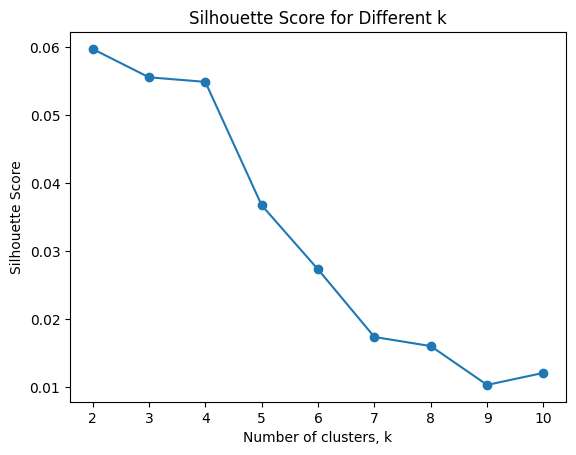

In [428]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Clustering
# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
# Test cluster sizes from 2 to 10
K = range(2, 11)  

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(top_genes_df)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(top_genes_df, labels)
    silhouette_scores.append(silhouette_avg)
    print(f'For n_clusters = {k}, the average silhouette_score is : {silhouette_avg}')

# Plot the silhouette scores
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.savefig('Silhouette_Score.png')
plt.show()

In [419]:
# Choosing the optimal number of clusters based on the plot
optimal_k = 4
print(f'The optimal number of clusters is: {optimal_k}')

# Perform clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(top_genes_df)

# Assign clusters to patients using .loc to avoid SettingWithCopyWarning
top_genes_df.loc[:, 'cluster'] = clusters

The optimal number of clusters is: 4


/var/folders/n3/bhzh1q792jnd1_r15dvvgfmr0000gn/T/ipykernel_67460/1636780602.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_genes_df.loc[:, 'cluster'] = clusters


In [420]:
top_genes_df

,391123,56624,9573,401565,83956,120329,646074,254773,286967,203562,...,56139,442459,2570,55507,162514,93034,27330,170591,440854,cluster
TCGA-3C-AAAU-01,-0.1408,1.4346,0.2303,2.5327,0.2434,-1.1361,1.6470,-0.6972,1.1337,-1.0160,...,-0.8580,1.5648,0.7853,1.3353,2.0713,-0.0280,-0.2083,-0.1085,0.2514,1
TCGA-3C-AALI-01,3.1047,-0.8502,0.0687,2.7338,0.0565,-1.7081,1.8415,-0.3020,0.3393,-0.7117,...,-0.4752,0.8272,3.8172,-1.1506,-0.2453,-0.1456,-0.1906,-0.3864,-0.0396,0
TCGA-3C-AALJ-01,1.6491,-0.3581,-0.3912,-1.4722,-0.4755,-0.4617,2.0541,-1.5448,0.6804,-0.8420,...,0.0140,1.0168,0.2110,2.6889,0.2691,0.9718,-0.4675,0.8436,-1.8693,0
TCGA-3C-AALK-01,-0.8862,-0.3310,-0.4867,0.8993,-0.5859,0.9188,0.9161,0.1808,-0.6839,-0.3661,...,0.1146,0.3719,2.0777,-0.2550,-0.4253,-0.9575,-0.0080,-0.6696,-1.4658,3
TCGA-4H-AAAK-01,-0.3331,0.6959,-1.0810,0.0899,-0.8789,0.2119,-1.1614,-0.5302,0.1509,-0.5871,...,-0.6954,-0.1706,0.1311,-0.5972,-1.1436,0.2039,-0.4606,-0.2018,-0.9105,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WT-AB44-01,2.4995,-1.0969,-0.0581,-0.3324,-1.3114,0.6802,0.8414,-1.5448,3.8074,2.6852,...,0.9246,-0.2273,-1.8416,1.0900,-1.4758,-0.8973,-1.4046,-0.6848,-1.1749,0
TCGA-XX-A899-01,-0.9176,-0.7754,-0.8106,0.3237,-0.6443,0.8480,-0.4053,-1.5448,-0.3120,-0.6487,...,1.4419,0.2948,1.7529,-0.5409,0.6102,0.0659,-0.3332,1.9029,-0.1053,3
TCGA-XX-A89A-01,0.0209,-0.9734,1.0311,-1.4722,0.3362,0.6338,0.0136,2.3015,-0.0601,0.9578,...,0.2019,-0.8200,0.5646,0.4281,-0.2652,-0.7572,-1.8500,2.7318,-0.8407,3
TCGA-Z7-A8R5-01,1.0079,-2.3604,1.6922,-0.5829,0.4551,0.9631,1.2848,-1.5448,2.0489,0.2183,...,1.3359,2.0059,-1.8416,-0.0976,-1.4758,1.2131,-1.1442,0.9910,0.6606,0


In [434]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Set the random seed for reproducibility
np.random.seed(42)

# Randomly pick one of the top 100 genes
selected_gene = np.random.choice(top_genes)
print(f'Selected gene for survival analysis: {selected_gene}')

# Merge top 100 gene expression data with survival data
top_genes_merged = top_genes_df.merge(clean_clinical_data, how='outer', left_index=True, right_index=True)
top_genes_merged['OS_STATUS'] = top_genes_merged['OS_STATUS'].astype(int)
top_genes_merged['OS_MONTHS'] = top_genes_merged['OS_MONTHS'].astype(float)

top_genes_merged = top_genes_merged.dropna()
top_genes_merged

Selected gene for survival analysis: 414332


,391123,56624,9573,401565,83956,120329,646074,254773,286967,203562,...,2570,55507,162514,93034,27330,170591,440854,cluster,OS_STATUS,OS_MONTHS
TCGA-3C-AAAU-01,-0.1408,1.4346,0.2303,2.5327,0.2434,-1.1361,1.6470,-0.6972,1.1337,-1.0160,...,0.7853,1.3353,2.0713,-0.0280,-0.2083,-0.1085,0.2514,1.0,0,133.050597
TCGA-3C-AALI-01,3.1047,-0.8502,0.0687,2.7338,0.0565,-1.7081,1.8415,-0.3020,0.3393,-0.7117,...,3.8172,-1.1506,-0.2453,-0.1456,-0.1906,-0.3864,-0.0396,0.0,0,131.669790
TCGA-3C-AALJ-01,1.6491,-0.3581,-0.3912,-1.4722,-0.4755,-0.4617,2.0541,-1.5448,0.6804,-0.8420,...,0.2110,2.6889,0.2691,0.9718,-0.4675,0.8436,-1.8693,0.0,0,48.459743
TCGA-3C-AALK-01,-0.8862,-0.3310,-0.4867,0.8993,-0.5859,0.9188,0.9161,0.1808,-0.6839,-0.3661,...,2.0777,-0.2550,-0.4253,-0.9575,-0.0080,-0.6696,-1.4658,3.0,0,47.604958
TCGA-4H-AAAK-01,-0.3331,0.6959,-1.0810,0.0899,-0.8789,0.2119,-1.1614,-0.5302,0.1509,-0.5871,...,0.1311,-0.5972,-1.1436,0.2039,-0.4606,-0.2018,-0.9105,3.0,0,11.440971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WT-AB44-01,2.4995,-1.0969,-0.0581,-0.3324,-1.3114,0.6802,0.8414,-1.5448,3.8074,2.6852,...,-1.8416,1.0900,-1.4758,-0.8973,-1.4046,-0.6848,-1.1749,0.0,0,29.029819
TCGA-XX-A899-01,-0.9176,-0.7754,-0.8106,0.3237,-0.6443,0.8480,-0.4053,-1.5448,-0.3120,-0.6487,...,1.7529,-0.5409,0.6102,0.0659,-0.3332,1.9029,-0.1053,3.0,0,15.353256
TCGA-XX-A89A-01,0.0209,-0.9734,1.0311,-1.4722,0.3362,0.6338,0.0136,2.3015,-0.0601,0.9578,...,0.5646,0.4281,-0.2652,-0.7572,-1.8500,2.7318,-0.8407,3.0,0,16.043660
TCGA-Z7-A8R5-01,1.0079,-2.3604,1.6922,-0.5829,0.4551,0.9631,1.2848,-1.5448,2.0489,0.2183,...,-1.8416,-0.0976,-1.4758,1.2131,-1.1442,0.9910,0.6606,0.0,0,108.064569


In [435]:
# Perform survival analysis for each cluster

# Dictionary to store CoxPHFitter objects for each cluster
cox_models = {}  

for cluster in range(optimal_k):
    print(f'\nAnalyzing cluster {cluster}...')
    
    # Filter data for the current cluster
    cluster_df = top_genes_merged[top_genes_merged['cluster'] == cluster]
    
    # Cox Proportional Hazards Model (CoxPH)
    cph = CoxPHFitter()
    cph_data = cluster_df[[selected_gene, 'OS_MONTHS', 'OS_STATUS']].dropna()
    # lifelines requires 'duration' instead of 'time'
    cph_data.columns = [selected_gene, 'duration', 'event']  
    
    cph.fit(cph_data, duration_col='duration', event_col='event')
    cph.print_summary()

    # Store the fitted model for plotting
    cox_models[cluster] = cph
    


Analyzing cluster 0...


<lifelines.CoxPHFitter: fitted with 166 total observations, 143 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 166
number of events observed = 23
   partial log-likelihood = -95.11
         time fit was run = 2024-07-26 16:17:46 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
414332    -0.13      0.88      0.20           -0.52            0.26                0.60                1.29

           cmp to     z    p  -log2(p)
covariate                             
414332       0.00 -0.66 0.51      0.96
---
Concordance = 0.54
Partial AIC = 192.22
log-likelihood ratio test = 0.43 on 1 df
-log2(p) of ll-ratio test = 0.97


Analyzing cluster 1...


<lifelines.CoxPHFitter: fitted with 494 total observations, 419 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 494
number of events observed = 75
   partial log-likelihood = -354.34
         time fit was run = 2024-07-26 16:17:46 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
414332    -0.31      0.73      0.18           -0.65            0.03                0.52                1.03

           cmp to     z    p  -log2(p)
covariate                             
414332       0.00 -1.77 0.08      3.70
---
Concordance = 0.55
Partial AIC = 710.68
log-likelihood ratio test = 3.23 on 1 df
-log2(p) of ll-ratio test = 3.79


Analyzing cluster 2...


<lifelines.CoxPHFitter: fitted with 162 total observations, 139 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 162
number of events observed = 23
   partial log-likelihood = -91.22
         time fit was run = 2024-07-26 16:17:46 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
414332     0.28      1.33      0.26           -0.22            0.79                0.80                2.20

           cmp to    z    p  -log2(p)
covariate                            
414332       0.00 1.09 0.27      1.87
---
Concordance = 0.59
Partial AIC = 184.43
log-likelihood ratio test = 1.19 on 1 df
-log2(p) of ll-ratio test = 1.86


Analyzing cluster 3...


<lifelines.CoxPHFitter: fitted with 260 total observations, 230 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 260
number of events observed = 30
   partial log-likelihood = -122.97
         time fit was run = 2024-07-26 16:17:46 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
414332    -0.15      0.86      0.22           -0.58            0.28                0.56                1.32

           cmp to     z    p  -log2(p)
covariate                             
414332       0.00 -0.68 0.50      1.01
---
Concordance = 0.54
Partial AIC = 247.94
log-likelihood ratio test = 0.47 on 1 df
-log2(p) of ll-ratio test = 1.02


Generating plots for cluster 0...


<Figure size 640x480 with 0 Axes>

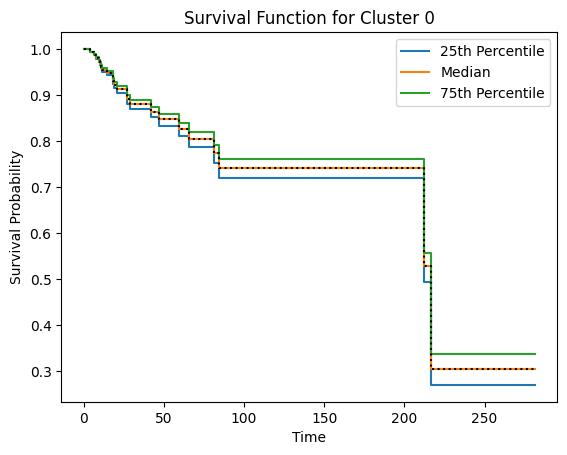

<Figure size 640x480 with 0 Axes>

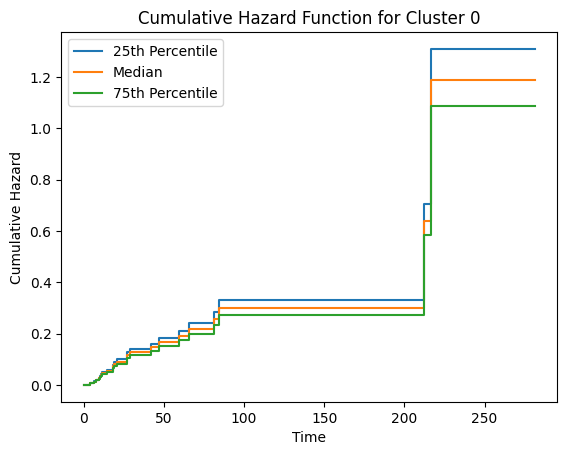


Generating plots for cluster 1...


<Figure size 640x480 with 0 Axes>

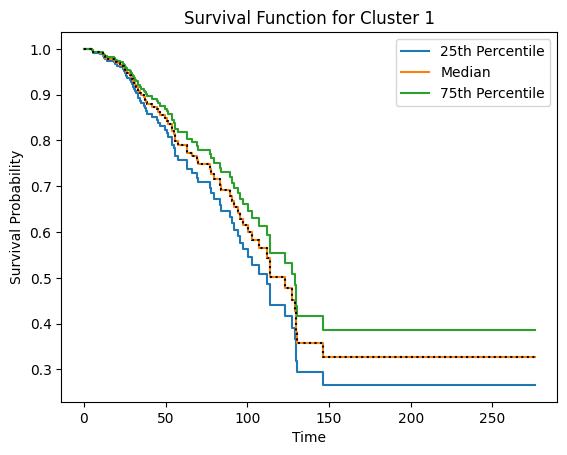

<Figure size 640x480 with 0 Axes>

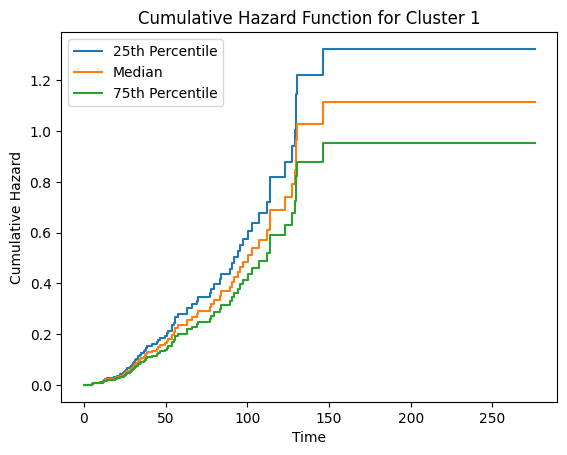


Generating plots for cluster 2...


<Figure size 640x480 with 0 Axes>

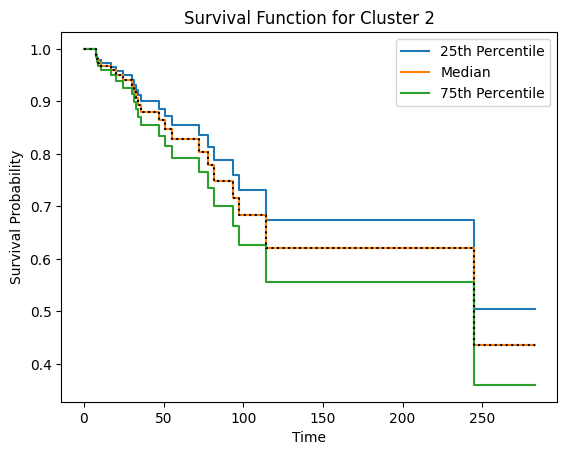

<Figure size 640x480 with 0 Axes>

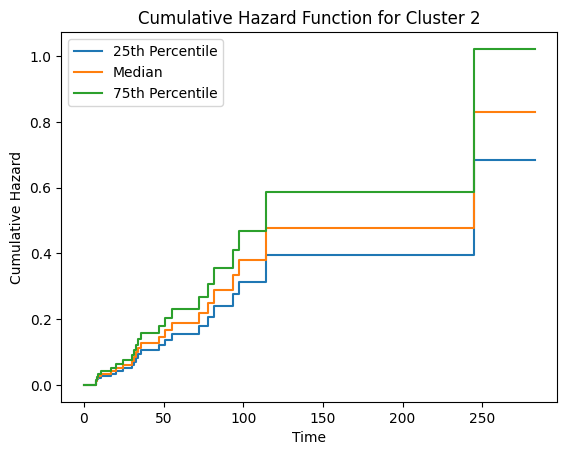


Generating plots for cluster 3...


<Figure size 640x480 with 0 Axes>

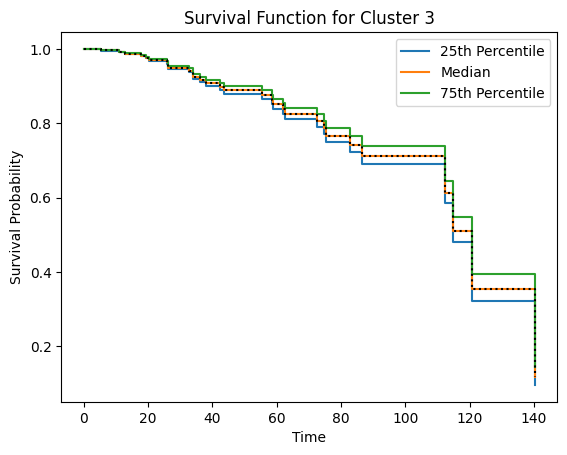

<Figure size 640x480 with 0 Axes>

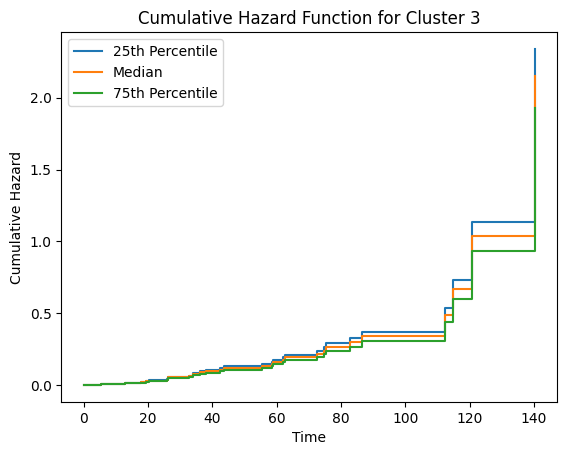

In [438]:
# Generate plots for each cluster based on the fitted Cox models
for cluster in range(optimal_k):
    print(f'\nGenerating plots for cluster {cluster}...')

    cph = cox_models[cluster]
    cluster_df = top_genes_merged[top_genes_merged['cluster'] == cluster]
    cph_data = cluster_df[[selected_gene, 'OS_MONTHS', 'OS_STATUS']].dropna()
    cph_data.columns = [selected_gene, 'duration', 'event']

    # Plot survival functions for different levels of the selected gene
    plt.figure()
    cph.plot_partial_effects_on_outcome(covariates=selected_gene, values=[cph_data[selected_gene].quantile(0.25), 
                                                                           cph_data[selected_gene].median(), 
                                                                           cph_data[selected_gene].quantile(0.75)])
    plt.title(f'Survival Function for Cluster {cluster}')
    plt.xlabel('Time')
    plt.ylabel('Survival Probability')
    plt.legend(['25th Percentile', 'Median', '75th Percentile'])
    # Save the plot
    plt.savefig(f'survival_function_cluster_{cluster}.png')  
    plt.show()

    # Plot cumulative hazard functions for different levels of the selected gene
    plt.figure()
    cph.plot_partial_effects_on_outcome(covariates=selected_gene, values=[cph_data[selected_gene].quantile(0.25), 
                                                                           cph_data[selected_gene].median(), 
                                                                           cph_data[selected_gene].quantile(0.75)], 
                                        plot_baseline=False, y='cumulative_hazard')
    plt.title(f'Cumulative Hazard Function for Cluster {cluster}')
    plt.xlabel('Time')
    plt.ylabel('Cumulative Hazard')
    plt.legend(['25th Percentile', 'Median', '75th Percentile'])
    # Save the plot
    plt.savefig(f'cumulative_hazard_cluster_{cluster}.png')  
    plt.show()


Analyzing cluster 0...


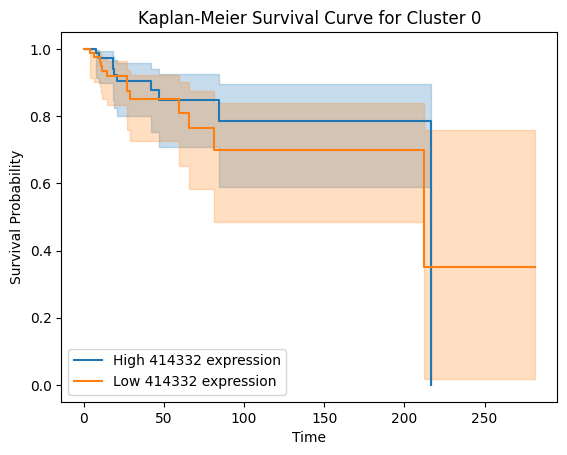

Log-rank test p-value for cluster 0: 0.4700351667634415

Analyzing cluster 1...


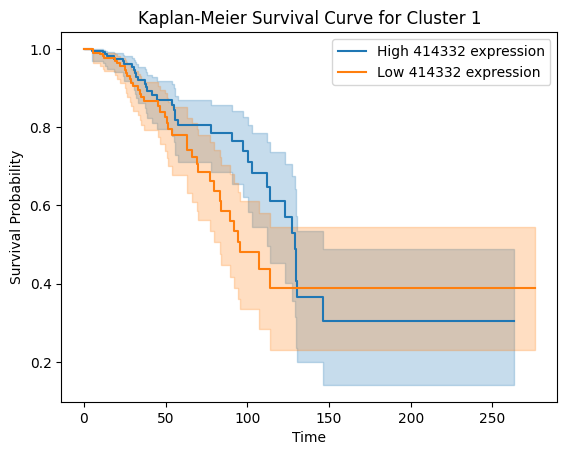

Log-rank test p-value for cluster 1: 0.12049274230290255

Analyzing cluster 2...


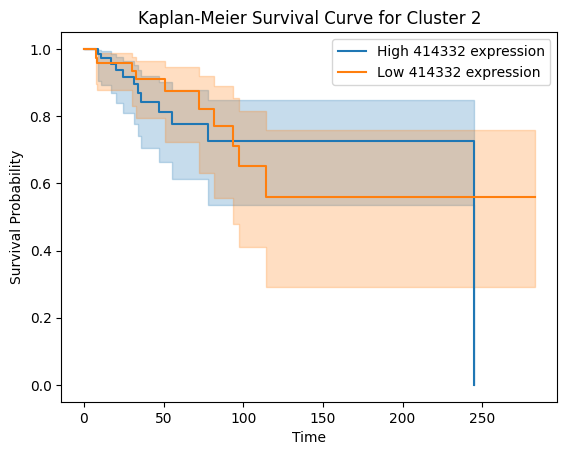

Log-rank test p-value for cluster 2: 0.7241615151647266

Analyzing cluster 3...


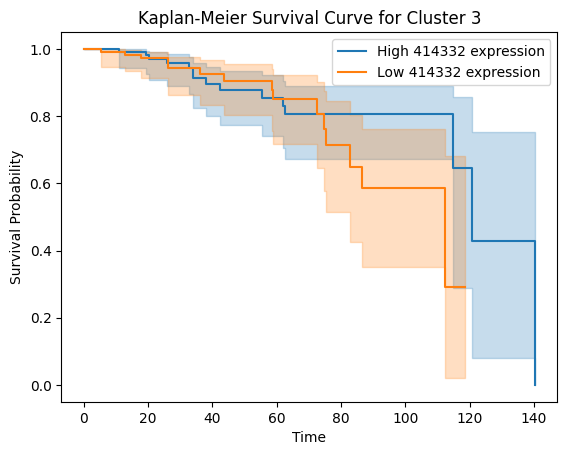

Log-rank test p-value for cluster 3: 0.32727331457576486


In [437]:
# Kaplan-Meier Survival Analysis

for cluster in range(optimal_k):
    print(f'\nAnalyzing cluster {cluster}...')

    # Filter data for the current cluster
    cluster_df = top_genes_merged[top_genes_merged['cluster'] == cluster]
    
    kmf = KaplanMeierFitter()
    
    # Split patients into high and low expression groups based on the median expression level
    median_expression = cluster_df[selected_gene].median()
    high_expr = cluster_df[cluster_df[selected_gene] > median_expression]
    low_expr = cluster_df[cluster_df[selected_gene] <= median_expression]
    
    # Plot Kaplan-Meier survival curves
    plt.figure()
    kmf.fit(high_expr['OS_MONTHS'], high_expr['OS_STATUS'], label=f'High {selected_gene} expression')
    ax = kmf.plot_survival_function()
    kmf.fit(low_expr['OS_MONTHS'], low_expr['OS_STATUS'], label=f'Low {selected_gene} expression')
    kmf.plot_survival_function(ax=ax)
    
    plt.title(f'Kaplan-Meier Survival Curve for Cluster {cluster}')
    plt.xlabel('Time')
    plt.ylabel('Survival Probability')
    plt.legend()
    # Save the plot
    plt.savefig(f'Kaplan_Meier_survival_curves_{cluster}.png')  
    plt.show()
    
    # Perform log-rank test to compare survival distributions
    results = logrank_test(high_expr['OS_MONTHS'], low_expr['OS_MONTHS'], high_expr['OS_STATUS'], low_expr['OS_STATUS'])
    print(f'Log-rank test p-value for cluster {cluster}: {results.p_value}')